======== For Diphtheria Field ========
Mean : 86.36944583125312
Median : 93.0
Mode : 99.0
Standard Deviation :15.504
Variance :240.367
Skewness :-1.847
Kurtosis :3.193

======== For BMI Field ========
Mean : 25.022116824762854
Median : 25.5
Mode : 25.8
Standard Deviation :2.186
Variance :4.779
Skewness :-0.100
Kurtosis :-0.099

======== For Alcohol Consumption Field ========
Mean : 4.906069645531702
Median : 4.1
Mode : 0.0
Standard Deviation :4.041
Variance :16.326
Skewness :0.545
Kurtosis :-0.784

======== For Adult mortality Field ========
Mean : 193.37433474787818
Median : 164.433
Mode : 91.9455
Standard Deviation :115.441
Variance :13326.706
Skewness :1.357
Kurtosis :1.955


======= Linear Regression Results - Alcohol Consumption =======
Mean Squared Error: 71.5164997875242
R-squared: 0.16747630013318227




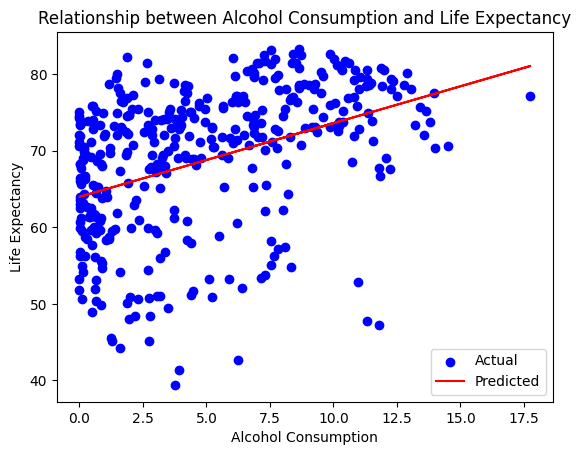



======= Linear Regression Results - Adult mortality =======
Mean Squared Error: 8.55709511803678
R-squared: 0.9003868406738913




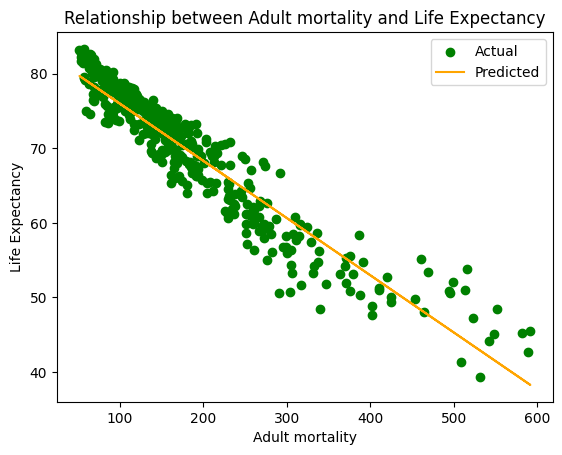

In [74]:
import pandas as pd
import statistics
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv("Life-Expectancy-Data.csv")

# Drop rows with missing values
df.dropna(inplace=True)

# Save cleaned data to a new CSV file
cleaned_file_path = 'cleaned_data.csv'
df.to_csv(cleaned_file_path, index=False)

print("======== For Diphtheria Field ========")
print("Mean :", statistics.mean(df['Diphtheria']))
print("Median :", statistics.median(df['Diphtheria']))
print("Mode :", statistics.mode(df['Diphtheria']))
print("Standard Deviation :%.3f" % statistics.stdev(df['Diphtheria']))
print("Variance :%.3f" % statistics.variance(df['Diphtheria']))
print("Skewness :%.3f" % skew(df['Diphtheria']))
print("Kurtosis :%.3f" % kurtosis(df['Diphtheria']))

print("\n======== For BMI Field ========")
print("Mean :", statistics.mean(df['BMI']))
print("Median :", statistics.median(df['BMI']))
print("Mode :", statistics.mode(df['BMI']))
print("Standard Deviation :%.3f" % statistics.stdev(df['BMI']))
print("Variance :%.3f" % statistics.variance(df['BMI']))
print("Skewness :%.3f" % skew(df['BMI']))
print("Kurtosis :%.3f" % kurtosis(df['BMI']))

print("\n======== For Alcohol Consumption Field ========")
print("Mean :", statistics.mean(df['Alcohol_consumption']))
print("Median :", statistics.median(df['Alcohol_consumption']))
print("Mode :", statistics.mode(df['Alcohol_consumption']))
print("Standard Deviation :%.3f" % statistics.stdev(df['Alcohol_consumption']))
print("Variance :%.3f" % statistics.variance(df['Alcohol_consumption']))
print("Skewness :%.3f" % skew(df['Alcohol_consumption']))
print("Kurtosis :%.3f" % kurtosis(df['Alcohol_consumption']))

print("\n======== For Adult mortality Field ========")
print("Mean :", statistics.mean(df['Adult_mortality']))
print("Median :", statistics.median(df['Adult_mortality']))
print("Mode :", statistics.mode(df['Adult_mortality']))
print("Standard Deviation :%.3f" % statistics.stdev(df['Adult_mortality']))
print("Variance :%.3f" % statistics.variance(df['Adult_mortality']))
print("Skewness :%.3f" % skew(df['Adult_mortality']))
print("Kurtosis :%.3f" % kurtosis(df['Adult_mortality']))

# Select features (Alcohol_consumption) and target (Life_expectancy)
X_alcohol = df[['Alcohol_consumption']]
y_alcohol = df['Life_expectancy']

# Select features (Adult_mortality) and target (Life_expectancy)
X_adult_mortality = df[['Adult_mortality']]
y_adult_mortality = df['Life_expectancy']

# Split the data into training and testing sets for alcohol consumption
X_train_alcohol, X_test_alcohol, y_train_alcohol, y_test_alcohol = train_test_split(X_alcohol, y_alcohol, test_size=0.2, random_state=42)

# Create and fit the model for alcohol consumption
model_alcohol = LinearRegression()
model_alcohol.fit(X_train_alcohol, y_train_alcohol)

# Make predictions for alcohol consumption
y_pred_alcohol = model_alcohol.predict(X_test_alcohol)

# Evaluate the model for alcohol consumption
mse_alcohol = mean_squared_error(y_test_alcohol, y_pred_alcohol)
r2_alcohol = r2_score(y_test_alcohol, y_pred_alcohol)

print("\n\n======= Linear Regression Results - Alcohol Consumption =======")
print("Mean Squared Error:", mse_alcohol)
print("R-squared:", r2_alcohol)
print("\n")

# Plotting alcohol consumption
plt.scatter(X_test_alcohol, y_test_alcohol, color='blue', label='Actual')
plt.plot(X_test_alcohol, y_pred_alcohol, color='red', label='Predicted')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Life Expectancy')
plt.title('Relationship between Alcohol Consumption and Life Expectancy')
plt.legend()
plt.show()

# Split the data into training and testing sets for adult mortality
X_train_adult_mortality, X_test_adult_mortality, y_train_adult_mortality, y_test_adult_mortality = train_test_split(X_adult_mortality, y_adult_mortality, test_size=0.2, random_state=42)

# Create and fit the model for adult mortality
model_adult_mortality = LinearRegression()
model_adult_mortality.fit(X_train_adult_mortality, y_train_adult_mortality)

# Make predictions for adult mortality
y_pred_adult_mortality = model_adult_mortality.predict(X_test_adult_mortality)

# Evaluate the model for adult mortality
mse_adult_mortality = mean_squared_error(y_test_adult_mortality, y_pred_adult_mortality)
r2_adult_mortality = r2_score(y_test_adult_mortality, y_pred_adult_mortality)

print("\n\n======= Linear Regression Results - Adult mortality =======")
print("Mean Squared Error:", mse_adult_mortality)
print("R-squared:", r2_adult_mortality)
print("\n")

# Plotting adult mortality
plt.scatter(X_test_adult_mortality, y_test_adult_mortality, color='green', label='Actual')
plt.plot(X_test_adult_mortality, y_pred_adult_mortality, color='orange', label='Predicted')
plt.xlabel('Adult mortality')
plt.ylabel('Life Expectancy')
plt.title('Relationship between Adult mortality and Life Expectancy')
plt.legend()
plt.show()
